# Importing necessary modules

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Loading dataset

In [9]:
parquet_file=r'C:/Users/Acer/Downloads/data.parquet'
data = pd.read_parquet(parquet_file,engine='auto')


# Data Visualization

In [10]:
data

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


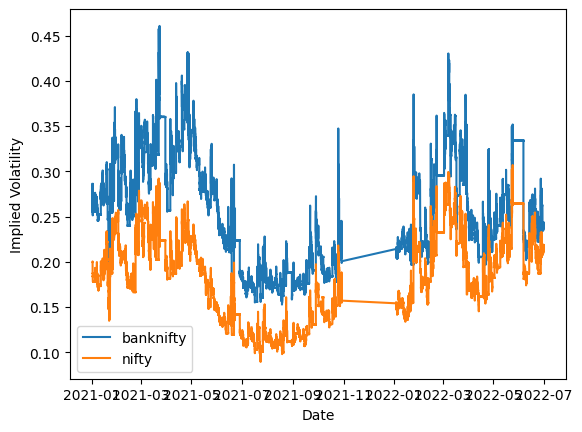

In [11]:
plt.plot(data['banknifty'], label='banknifty')
plt.plot(data['nifty'], label='nifty')
plt.xlabel("Date")
plt.ylabel("Implied Volatility")
plt.legend()

# Finding Correlation

In [12]:
corr_val=data['banknifty'].corr(data['nifty'])
corr_val

0.8962741084918425

# Handling missing values by filling with the mean of the previous 10 data points and calculating spread

In [13]:
data.fillna(data.rolling(10, min_periods=1).mean(), inplace=True)
data['Spread'] = data['banknifty'] - data['nifty']

# Implementing Z-score strategy

In [36]:
# Calculate z-score
data['Z_Score'] = zscore(data['Spread'])

# Define trading signals based on z-score threshold
threshold = 2
data['Signal'] = np.where(data['Z_Score'] > threshold, -1, np.where(data['Z_Score'] < -threshold, 1, 0))

# Calculate Profit-loss
data['P_L'] = data['Spread'] * (data['tte'] ** 0.7)

# Backtesting the z-score based trading system
data['Returns'] = data['Signal'].shift(1) * data['P_L']
data['Cumulative_Returns'] = data['Returns'].cumsum()

# Plotting the trading signals

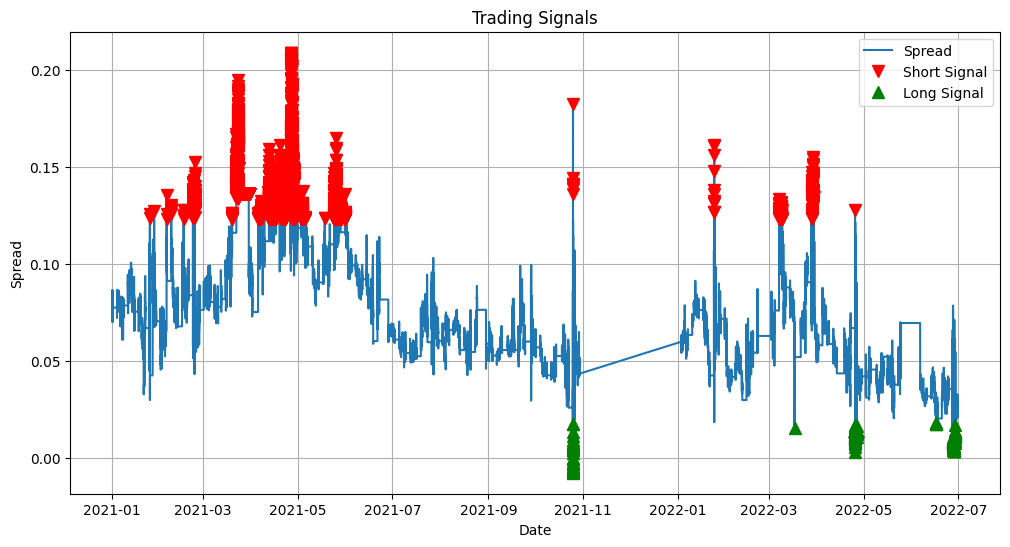

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.plot(data[data['Signal'] == -1].index, data['Spread'][data['Signal'] == -1], 'rv', markersize=8, label='Short Signal')
plt.plot(data[data['Signal'] == 1].index, data['Spread'][data['Signal'] == 1], 'g^', markersize=8, label='Long Signal')
plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics

In [38]:
sharpe_ratio_zscore = (data['Returns'].mean()-.001) / data['Returns'].std()
absolute_pl_zscore = data['Cumulative_Returns'].iloc[-1]
drawdown_zscore = (data['Cumulative_Returns'] - data['Cumulative_Returns'].cummax()).min()

print("Z-Score Based Strategy Performance Metrics:")
print("Sharpe Ratio:", sharpe_ratio_zscore)
print("Absolute P/L:", absolute_pl_zscore)
print("Drawdown:", drawdown_zscore)

Z-Score Based Strategy Performance Metrics:
Sharpe Ratio: -0.19611474379559063
Absolute P/L: -19816.966642368163
Drawdown: -19869.2359965074
